## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import BatchNormalization

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.5):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [5, 10, 15, 20]

In [9]:
from keras.callbacks import EarlyStopping
results = {}

for early_patience in PATIENCE:
    # 載入 Callbacks
    """Code Here
    設定 callbacks: Earlystop
    """
    earlystop = EarlyStopping(monitor = "val_loss",
                              patience = early_patience,
                              verbose = 1
                             )
    """Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
    """
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "EarlyStop_PATIENCE : %s" % str(early_patience)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

50000/50000 [==============================] - 2s 47us/step - loss: 1.5251 - acc: 0.4676 - val_loss: 1.6346 - val_acc: 0.4249
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4810 - acc: 0.4831 - val_loss: 1.6179 - val_acc: 0.4325
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4455 - acc: 0.4965 - val_loss: 1.5957 - val_acc: 0.4399
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4081 - acc: 0.5088 - val_loss: 1.5831 - val_acc: 0.4387
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3768 - acc: 0.5197 - val_loss: 1.5730 - val_acc: 0.4477
Epoch 11/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3453 - acc: 0.5325 - val_loss: 1.5587 - val_acc: 0.4531
Epoch 12/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.3174 - acc: 0.5431 - val_loss: 1.5559 - val_acc: 0.4505
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 2s 48us/step - loss: 1.0222 - acc: 0.6505 - val_loss: 1.5500 - val_acc: 0.4650
Epoch 24/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9950 - acc: 0.6621 - val_loss: 1.5673 - val_acc: 0.4668
Epoch 25/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.9704 - acc: 0.6707 - val_loss: 1.5658 - val_acc: 0.4697
Epoch 26/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.9438 - acc: 0.6829 - val_loss: 1.5861 - val_acc: 0.4651
Epoch 27/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.9217 - acc: 0.6878 - val_loss: 1.5817 - val_acc: 0.4692
Epoch 28/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.8947 - acc: 0.7009 - val_loss: 1.5857 - val_acc: 0.4712
Epoch 29/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.8684 - acc: 0.7111 - val_loss: 1.6185 - val_acc: 0.4691
Epoch 30/50
50000/50000 [=====================

Epoch 00036: early stopping


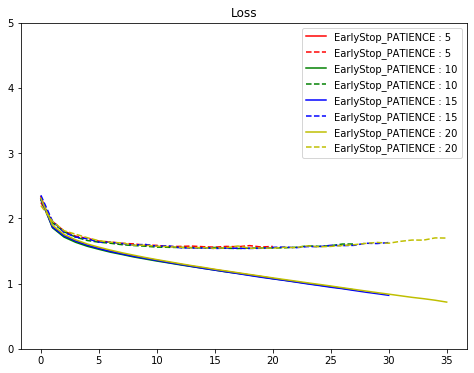

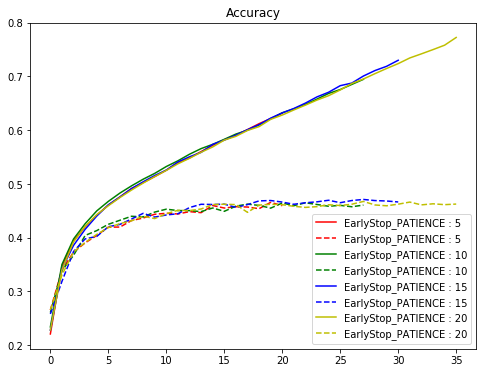

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
# Collect results
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()